IMPORTING FILES AND LIBRARIES

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
#importing data and giving encoding parameter because without it we are getting error
data = pd.read_csv("spam.csv", encoding="cp1252")

EDA

In [ ]:
#deleting columns
data = data.drop(columns="Unnamed: 2")
data = data.drop(columns="Unnamed: 3")
data = data.drop(columns="Unnamed: 4")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.rename(columns={"v1":"category", "v2":"message"}, inplace=True)

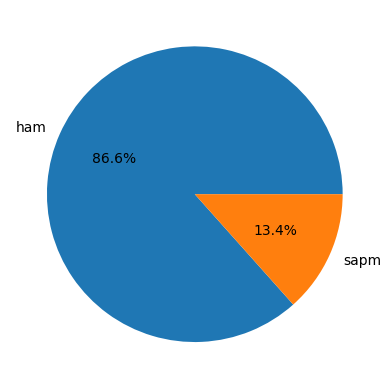

In [ ]:
#visualization
labels=["ham", "sapm"]
plt.pie(data["category"].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

Data Preprocessing

In [ ]:
#lable encoding
data.loc[data["category"] == "spam", "category"] = 0
data.loc[data["category"] == "ham", "category"] = 1

In [ ]:
# seprate the feature (message) and target (category) data
X = data["message"]
Y = data["category"]

In [ ]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: category, Length: 5572, dtype: object


MODEL TRAINING

In [ ]:
# Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
#print shape of X
print(X.shape)

(5572,)


In [ ]:
#print the shape of Y_test and Y_train and x_train and X_test
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


FEATURE EXTRACTION

NLP
TF = term frequency (how many times a word occur in a document)
IDF = inverse document frequency (how many times a word occur in overall document)

In [ ]:
# TF = term frequency (how many times a word occur in a document)
# IDF = inverse document frequency (how many times a word occur in overall document)
feature_extraction = TfidfVectorizer(min_df = 1, stop_words="english", lowercase = True)

In [ ]:
# Feature Extracation for training and testing data
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

In [ ]:
# converting y_train adn y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train)
print(Y_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: message, Length: 4457, dtype: object
3075    1
1787    1
1614    1
4304    1
3266    1
       ..
789     1
968     1
1667    1
3321    1
1688    1
Name: category, Length: 4457, dtype: int64


In [ ]:
print(X_train_feature)

  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.5787739591782677
  (4453, 999)	0.6760129013031282
  (4454, 5370)	0.42618909997886
  (4454, 7346)	0.31166263834107377
  (4454, 1049

In [ ]:
#model training
# logistic regression
#create and fit logistic regression model
model = LogisticRegression()
model.fit(X_train_feature, Y_train)

LogisticRegression()

In [ ]:
#evaluating the trained model
predict_train_data = model.predict(X_train_feature)

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train_data = accuracy_score(Y_train, predict_train_data)
print("Accuracy on training data:", accuracy_train_data)

Accuracy on training data: 0.9661207089970832


In [ ]:
# make prediction on test data
predict_test_data = model.predict(X_test_feature)

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_test_data = accuracy_score(Y_test, predict_test_data)
print("Accuracy on test data:", accuracy_test_data)

Accuracy on test data: 0.9623318385650225


In [ ]:
# test the model with an email message
new_mail = ['Congratulations of your achivement! Well done']
new_data_feature = feature_extraction.transform(new_mail)
prediction = model.predict(new_data_feature)
print(prediction)

[1]
